Problem Statement:
The Goal of this problem is to predict whether the person income is higher or lower than 50k based on some features related , so it's a binary classification problem. Firstly, i'll apply EDA to explore the data and understand the patterns and clean the data then perform some feature engineering to get more appropriate meaning of the feature and finally perform some models and select the best from the evalution.

In [ ]:
#used libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
adult_df=pd.read_csv('/content/adult.csv')

In [ ]:
adult_df
#shape(48842 rows * 14 features)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#check the types of the data -> 6  int and 8 object
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#catch some insights of statistics from the numerical data
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#check dublicated rows
adult_df.duplicated().sum()

52

In [ ]:
def duplicated_index(df): 
    df = df[df.duplicated(keep=False)]
    df = df.groupby(df.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()
    return df

In [ ]:
duplicated_index(adult_df)

[(4152, 40948),
 (3900, 15960),
 (8116, 26375),
 (33954, 34979),
 (1668, 19399),
 (23271, 37599),
 (6456, 38530),
 (31470, 37771),
 (20198, 48274),
 (14398, 30971),
 (1863, 46665),
 (22086, 27912),
 (14153, 24361, 31340),
 (21048, 25452),
 (5782, 26122),
 (6432, 46979),
 (1854, 36848),
 (15323, 44201),
 (10923, 25652),
 (37384, 42153),
 (10826, 46626),
 (488, 864),
 (9825, 41965),
 (22123, 29365, 38581),
 (14308, 20606, 21162),
 (21860, 44511),
 (24960, 42594),
 (5078, 25189),
 (9249, 11212),
 (7350, 38255),
 (33256, 34836),
 (7021, 13848),
 (14487, 30862),
 (33127, 48685),
 (1319, 11189),
 (21221, 45438),
 (41905, 45127),
 (12488, 18476),
 (5907, 19726),
 (26648, 44803),
 (14838, 36767),
 (34197, 38648),
 (13504, 34148),
 (28246, 47126),
 (32578, 33321),
 (11746, 35848),
 (24201, 38156),
 (23334, 38775),
 (18584, 21385)]

In [ ]:
adult_df = adult_df.drop_duplicates(keep='first')

In [ ]:
adult_df.duplicated().sum()

0

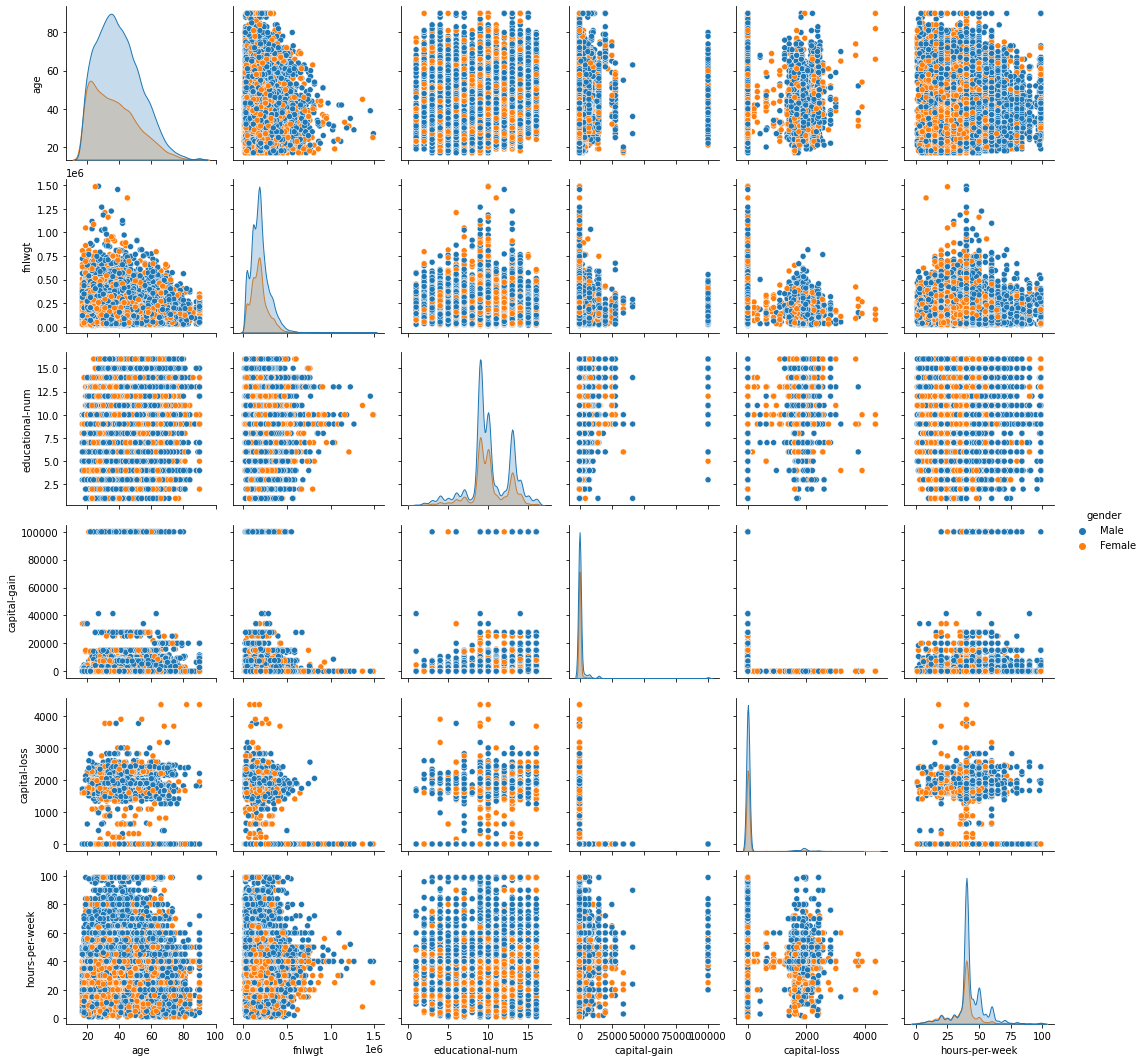

In [ ]:
#quick insight from univariate and bivariate 
sns.pairplot(adult_df,hue='gender', diag_kind='kde')  #

In [ ]:
adult_df.value_counts(sort=True, dropna=False)  #there are nans as  ?


age  workclass         fnlwgt  education     educational-num  marital-status      occupation       relationship   race                gender  capital-gain  capital-loss  hours-per-week  native-country  income
17   ?                 27251   11th          7                Widowed             ?                Own-child      White               Male    0             0             40              United-States   <=50K     1
44   Private           160829  Bachelors     13               Married-civ-spouse  Tech-support     Wife           White               Female  0             0             20              United-States   >50K      1
                       159911  7th-8th       4                Married-civ-spouse  Other-service    Wife           White               Female  0             0             55              United-States   <=50K     1
                       159960  Some-college  10               Divorced            Adm-clerical     Unmarried      White               Female  0      

In [ ]:
adult_df=adult_df.replace('?', np.nan)

In [ ]:
#summarize info about missing values
for column in adult_df.columns:
 # count number of rows with missing values
 n_miss = adult_df[column].isnull().sum()
 perc = n_miss / len(adult_df) *100 
 print('missing of {} is {} and percentage is {}'.format(column,n_miss,perc))

missing of age is 0 and percentage is 0.0
missing of workclass is 2795 and percentage is 5.728632916581267
missing of fnlwgt is 0 and percentage is 0.0
missing of education is 0 and percentage is 0.0
missing of educational-num is 0 and percentage is 0.0
missing of marital-status is 0 and percentage is 0.0
missing of occupation is 2805 and percentage is 5.7491289198606275
missing of relationship is 0 and percentage is 0.0
missing of race is 0 and percentage is 0.0
missing of gender is 0 and percentage is 0.0
missing of capital-gain is 0 and percentage is 0.0
missing of capital-loss is 0 and percentage is 0.0
missing of hours-per-week is 0 and percentage is 0.0
missing of native-country is 856 and percentage is 1.754457880713261
missing of income is 0 and percentage is 0.0


Univariate Analysis


In [ ]:
adult_df['workclass'].value_counts(dropna=False)

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
NaN                  2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

<Axes: xlabel='workclass', ylabel='Count'>

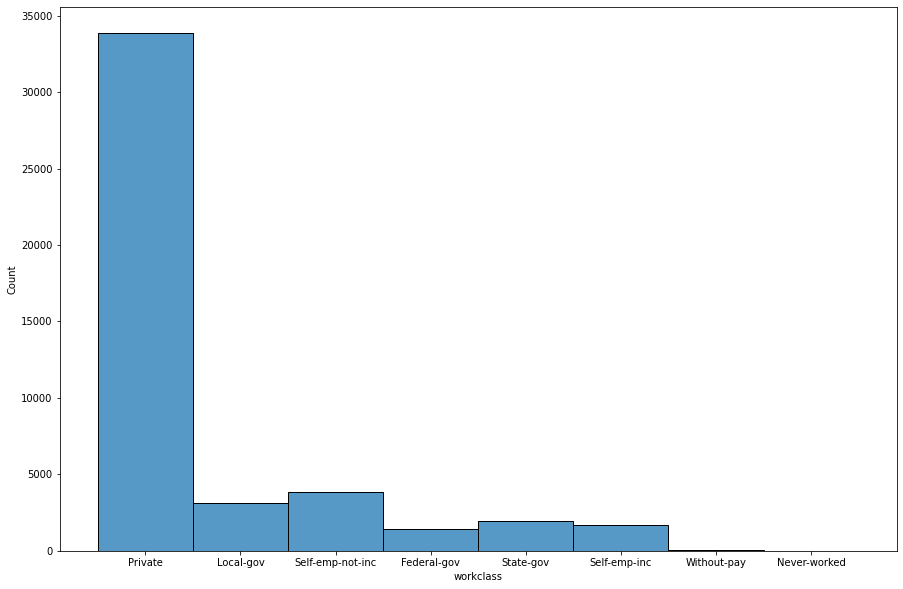

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(adult_df['workclass'])
# the nans are a lot and i haven't logic meaning to impute by the most frequent cause, the data will be more biased so i'll use knnimputer

In [ ]:
adult_df['occupation'].value_counts(dropna=False)

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
nan                  2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

<Axes: xlabel='occupation', ylabel='Count'>

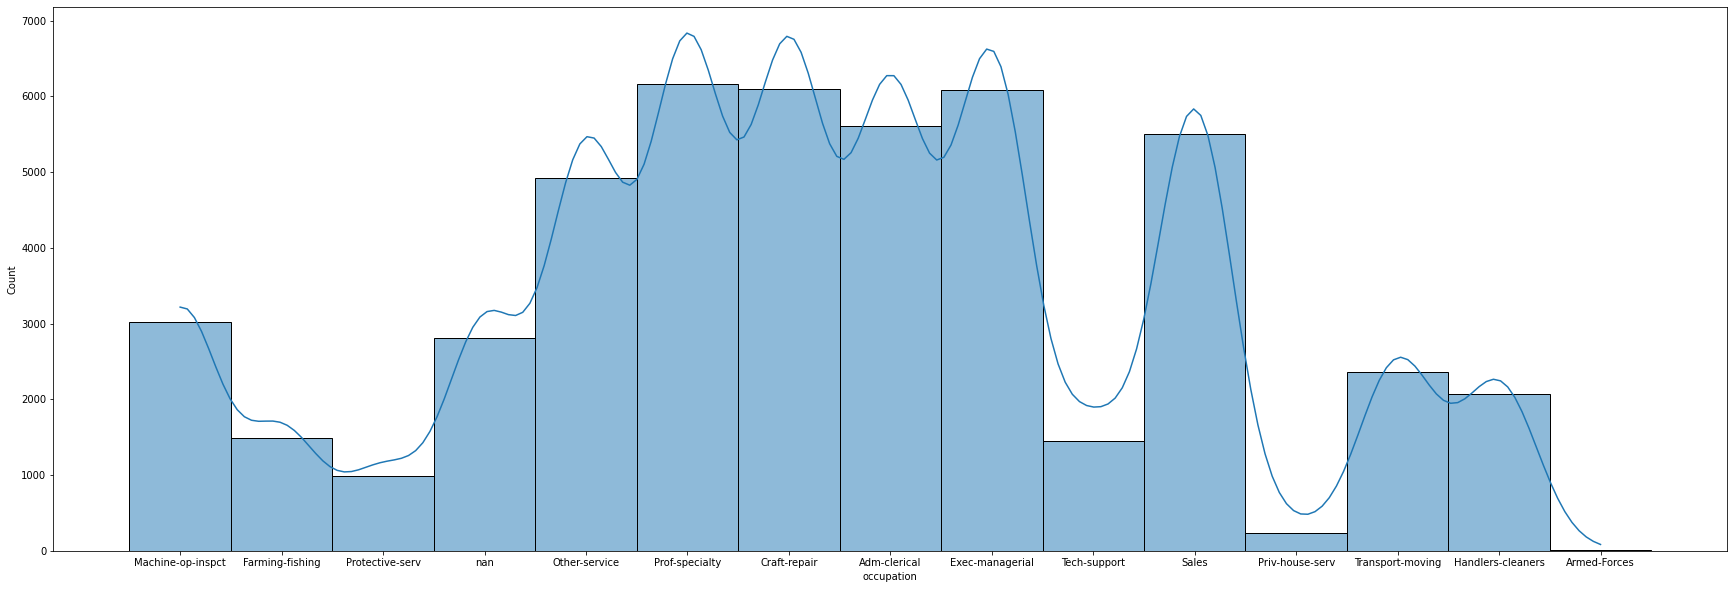

In [ ]:
plt.figure(figsize=(30,10))
sns.histplot(adult_df['occupation'],kde=True)
#it's okay to impute with the most frequent

In [ ]:
adult_df['native-country'].value_counts(dropna=False) #there aren't a lot of nans, so it's okay to use mode

United-States                 43792
Mexico                          943
NaN                             856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

<ipython-input-27-3ba444bb6fb7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_df['age'], kde=True)


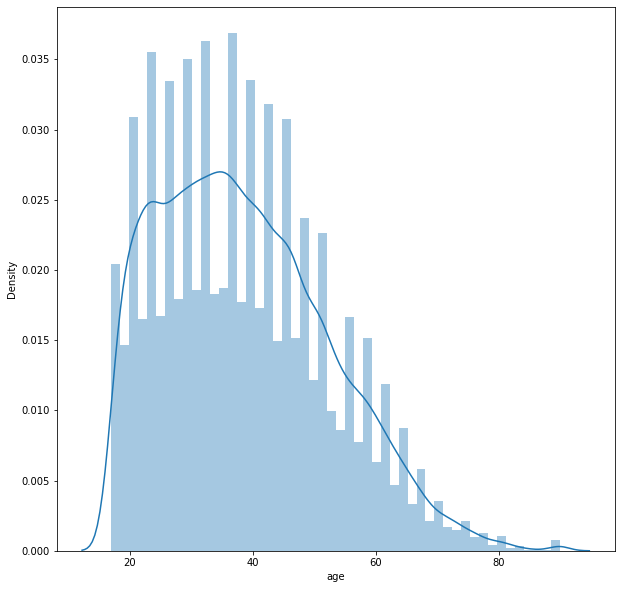

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(adult_df['age'], kde=True)
plt.show()

In [ ]:
adult_df['age'].value_counts(ascending=True).to_dict()

{86: 1,
 89: 2,
 87: 3,
 85: 5,
 88: 6,
 83: 11,
 84: 13,
 82: 15,
 79: 30,
 78: 34,
 81: 37,
 80: 38,
 77: 54,
 90: 54,
 76: 69,
 75: 72,
 74: 77,
 73: 108,
 71: 118,
 72: 120,
 70: 133,
 69: 149,
 68: 178,
 66: 237,
 67: 238,
 65: 284,
 63: 335,
 64: 340,
 62: 394,
 60: 449,
 61: 450,
 59: 523,
 57: 551,
 58: 555,
 56: 564,
 17: 594,
 54: 613,
 55: 621,
 53: 711,
 52: 738,
 48: 845,
 49: 845,
 18: 861,
 50: 866,
 51: 877,
 19: 1045,
 44: 1066,
 47: 1080,
 21: 1092,
 45: 1095,
 46: 1095,
 43: 1103,
 20: 1111,
 26: 1153,
 42: 1164,
 22: 1176,
 40: 1187,
 25: 1190,
 39: 1204,
 24: 1205,
 29: 1221,
 27: 1231,
 41: 1234,
 32: 1253,
 38: 1263,
 30: 1275,
 37: 1279,
 28: 1279,
 34: 1303,
 31: 1324,
 23: 1325,
 33: 1335,
 35: 1336,
 36: 1348}

In [ ]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
adult_df['fnlwgt'].value_counts().to_dict()

{203488: 21,
 190290: 19,
 120277: 19,
 125892: 18,
 126569: 18,
 113364: 17,
 99185: 17,
 126675: 17,
 186934: 16,
 120131: 15,
 111567: 15,
 127651: 15,
 123011: 15,
 117963: 15,
 148995: 14,
 111483: 14,
 164190: 14,
 108140: 14,
 121124: 14,
 136986: 14,
 132879: 14,
 123983: 14,
 193882: 14,
 188246: 14,
 156464: 13,
 177675: 13,
 155489: 13,
 144778: 13,
 174789: 13,
 216129: 13,
 97723: 13,
 241998: 13,
 194630: 13,
 214542: 13,
 125461: 13,
 144949: 13,
 104196: 13,
 112115: 13,
 117789: 13,
 96062: 13,
 102308: 12,
 99146: 12,
 155659: 12,
 218490: 12,
 112497: 12,
 150057: 12,
 125933: 12,
 123429: 12,
 176185: 12,
 167482: 12,
 129573: 11,
 145441: 11,
 246891: 11,
 198841: 11,
 221172: 11,
 109133: 11,
 140001: 11,
 116358: 11,
 145964: 11,
 173858: 11,
 106900: 11,
 82393: 11,
 175958: 11,
 212894: 11,
 188069: 11,
 154374: 11,
 79586: 11,
 213140: 11,
 72887: 11,
 150533: 11,
 107231: 11,
 162312: 11,
 181091: 11,
 116632: 11,
 118551: 11,
 107302: 11,
 119793: 11,
 16114

<ipython-input-43-8603c541df77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_df['fnlwgt'])


<Axes: xlabel='fnlwgt', ylabel='Density'>

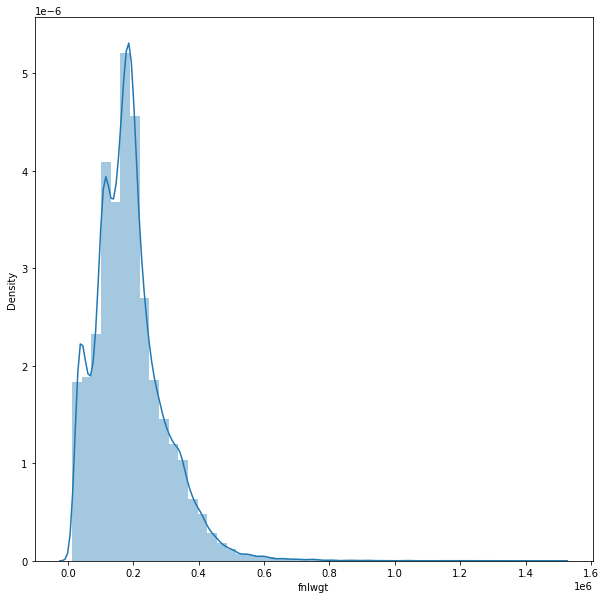

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(adult_df['fnlwgt'])  #right skewed

<Axes: xlabel='education', ylabel='Count'>

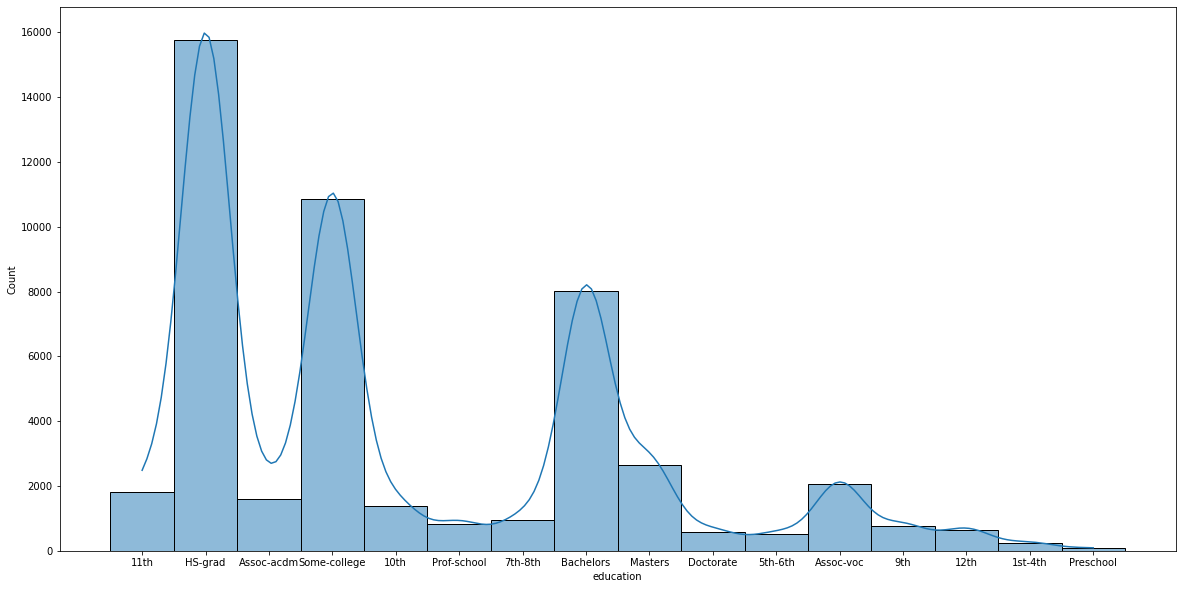

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(adult_df['education'], kde=True)  #we may compact our categories in feature engineering part

<Axes: xlabel='educational-num', ylabel='Count'>

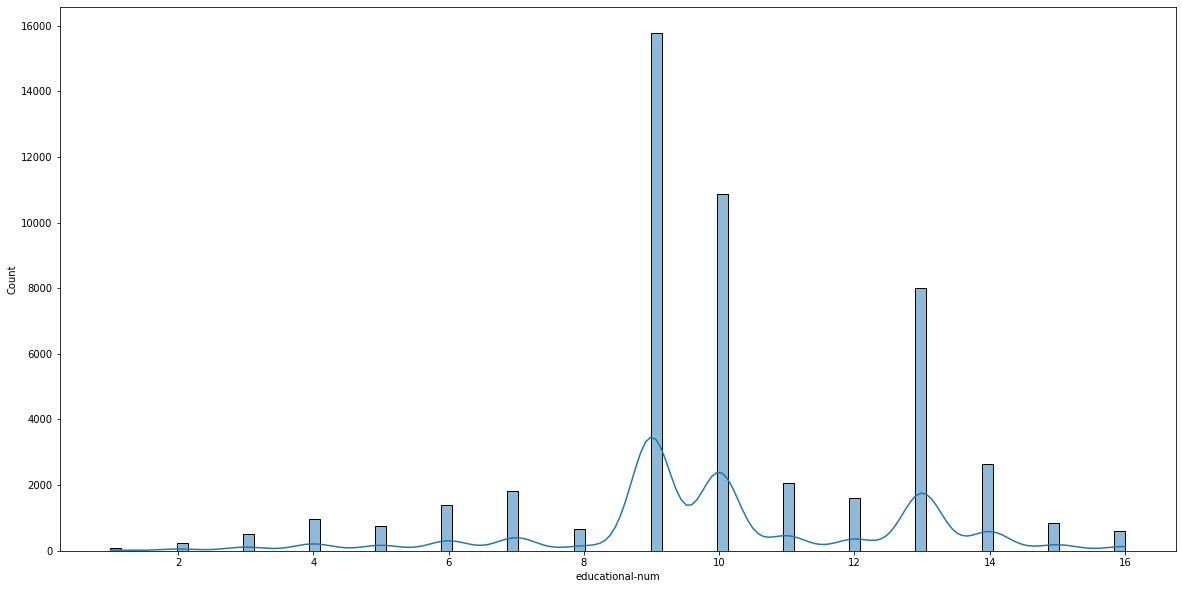

In [ ]:
plt.figure(figsize=(20,10))          #9 , 10 and 13 have the most population
sns.histplot(adult_df['educational-num'], kde=True)  #eductional level

<Axes: xlabel='marital-status', ylabel='Count'>

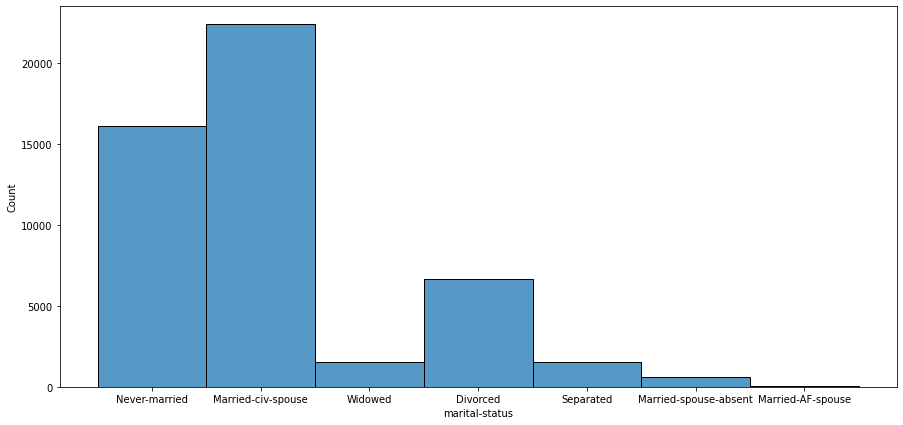

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(adult_df['marital-status'])

<Axes: xlabel='relationship', ylabel='Count'>

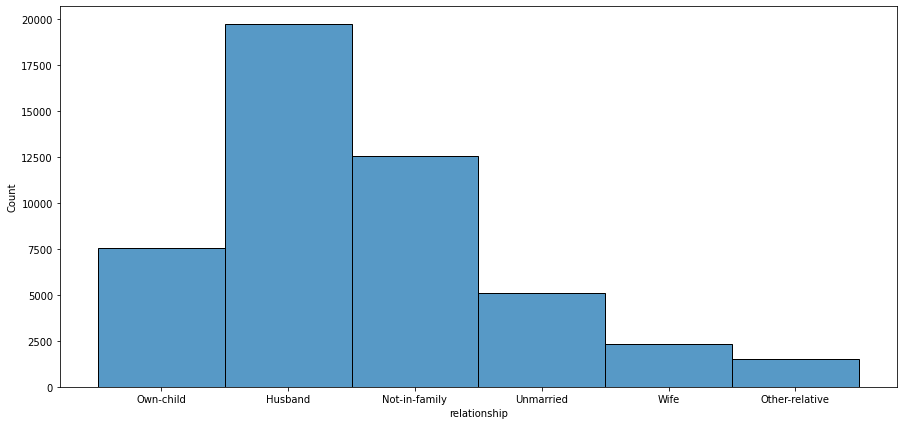

In [ ]:

plt.figure(figsize=(15,7))
sns.histplot(adult_df['relationship'])

<Axes: xlabel='race', ylabel='Count'>

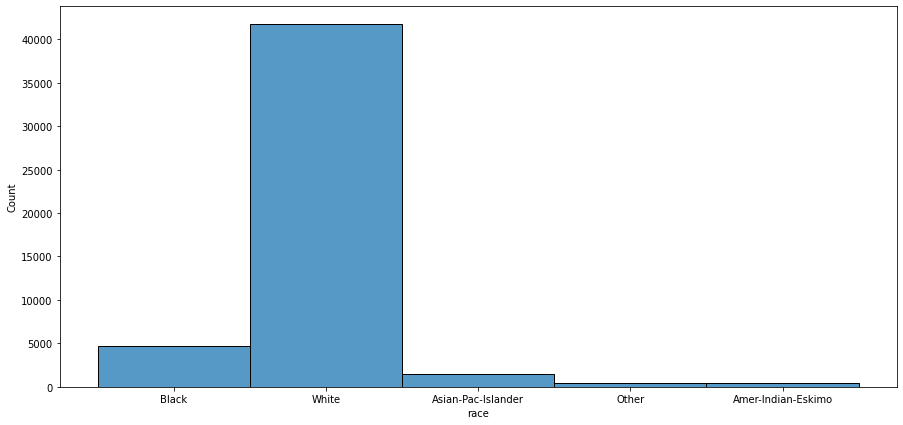

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(adult_df['race'])

<Axes: xlabel='gender', ylabel='Count'>

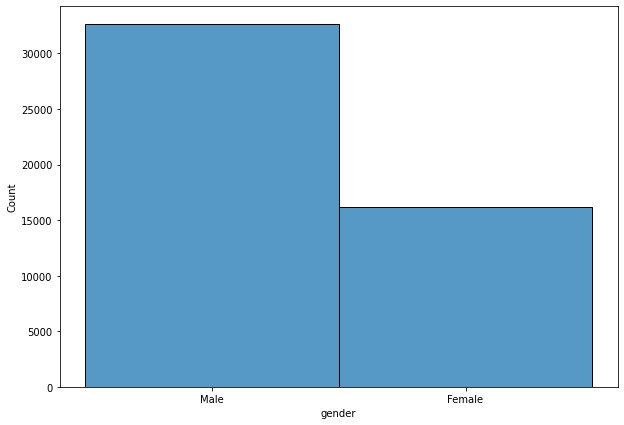

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(adult_df['gender'])

<ipython-input-55-9b6425f34cb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_df['capital-gain'])


<Axes: xlabel='capital-gain', ylabel='Density'>

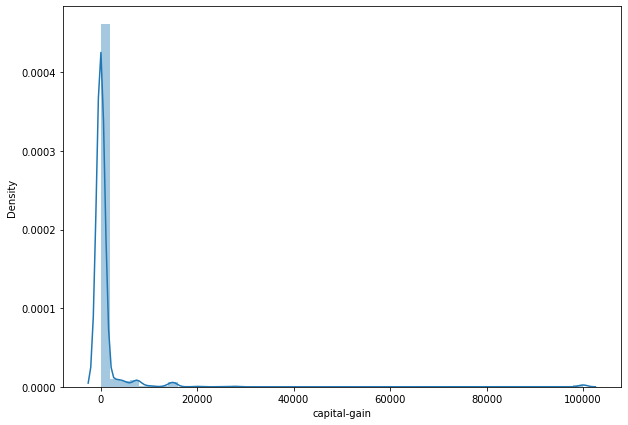

In [ ]:

plt.figure(figsize=(10,7))
sns.distplot(adult_df['capital-gain'])

In [ ]:
adult_df['capital-gain'].value_counts()

0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

In [ ]:
adult_df['capital-gain'].value_counts()[0]/len(adult_df['capital-gain'])   #91% of the data is 0 so, we should delete the column

0.9172986267677803

In [ ]:
adult_df['capital-loss'].value_counts()[0]/len(adult_df['capital-loss'])  #95% of the data is 0 so, we should delete the column

0.9532281205164993

In [ ]:
adult_df.drop(['capital-gain','capital-loss'], axis=1, inplace=True)

In [ ]:
adult_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,nan,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


<ipython-input-64-0c09d525223f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adult_df['hours-per-week'])


<Axes: xlabel='hours-per-week', ylabel='Density'>

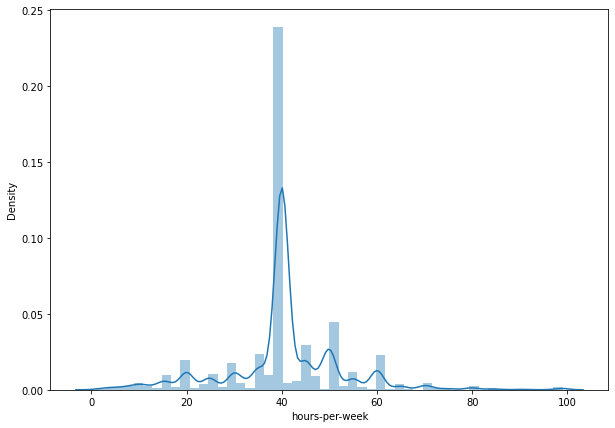

In [ ]:

plt.figure(figsize=(10,7))
sns.distplot(adult_df['hours-per-week'])  #te most case is 40 hours per a week

<Axes: xlabel='count', ylabel='income'>

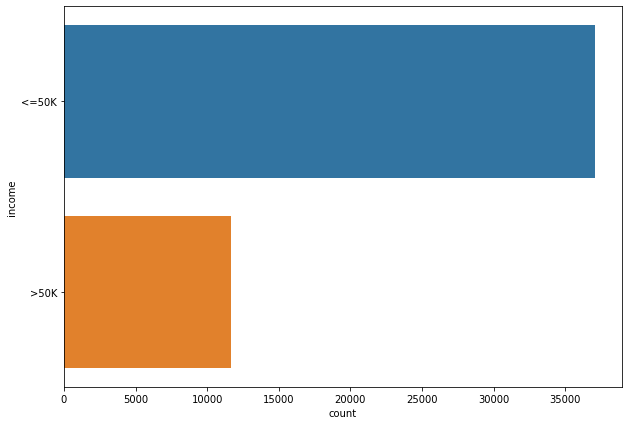

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y='income', data=adult_df) #it's unbalanced data

Bivariate and Multivariate Analysis


<Axes: xlabel='age', ylabel='hours-per-week'>

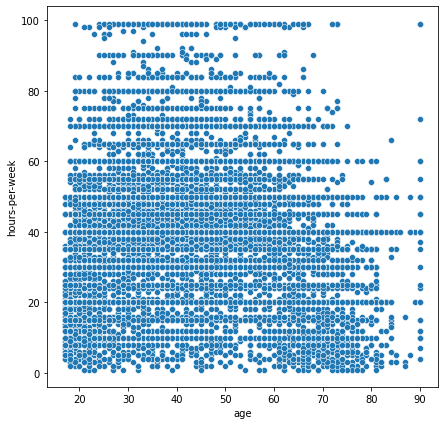

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=adult_df['age'], y=adult_df['hours-per-week'])   #no clear correlation

<Axes: xlabel='age', ylabel='educational-num'>

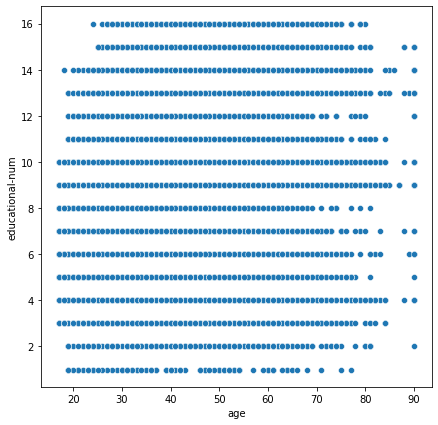

In [ ]:
plt.figure(figsize=(7,7))     
sns.scatterplot(x=adult_df['age'], y=adult_df['educational-num'])

<ipython-input-83-f1107879ed5a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=adult_df, x='fnlwgt', hue='income', shade=True)


<Axes: xlabel='fnlwgt', ylabel='Density'>

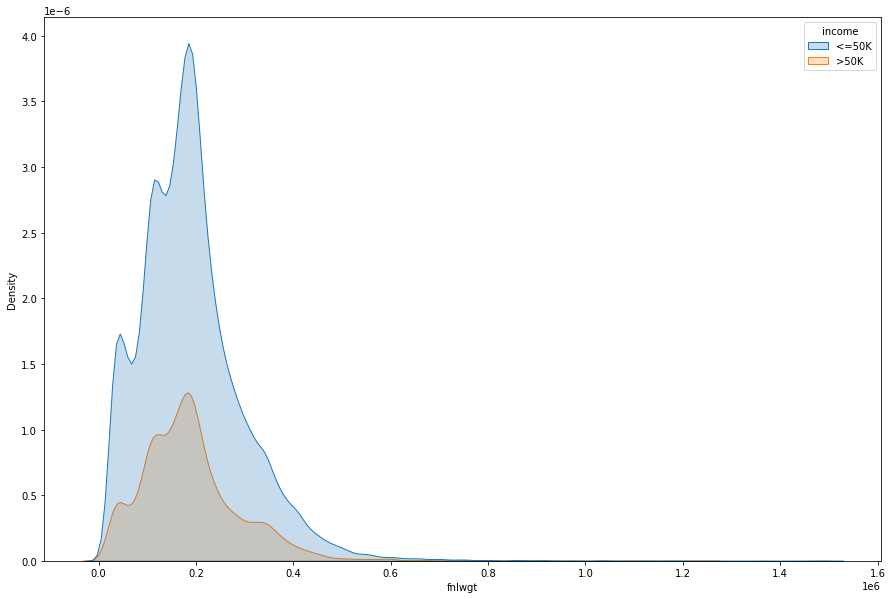

In [ ]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=adult_df, x='fnlwgt', hue='income', shade=True)

<Axes: xlabel='count', ylabel='workclass'>

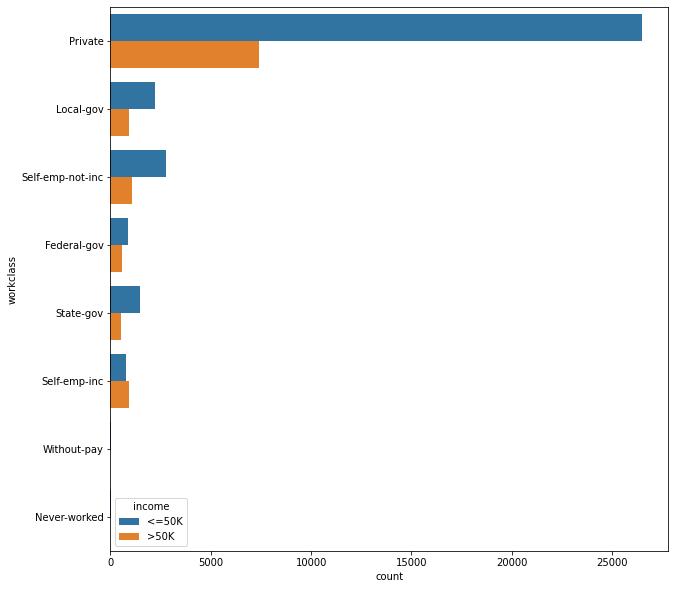

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(y='workclass',data=adult_df, hue='income')

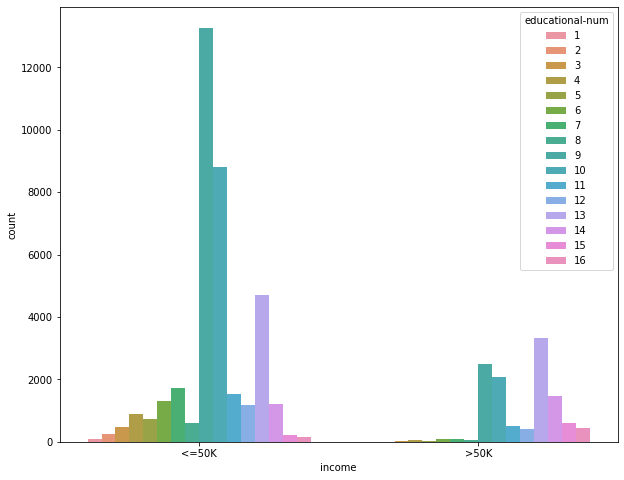

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(x='income',hue='educational-num',data=adult_df)
plt.show()

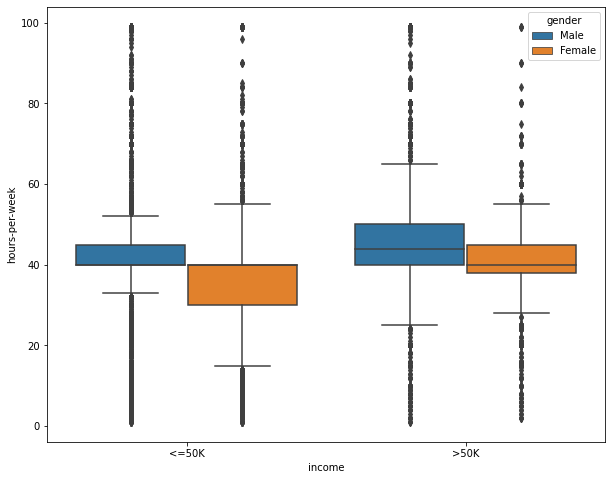

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='income',y='hours-per-week',hue='gender',data=adult_df)
plt.show()

In [ ]:
adult_df.corr()

,age,fnlwgt,educational-num,hours-per-week
age,1.000000,-0.076451,0.030635,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.013521
educational-num,0.030635,-0.038727,1.000000,0.143915
hours-per-week,0.071223,-0.013521,0.143915,1.000000


<Axes: >

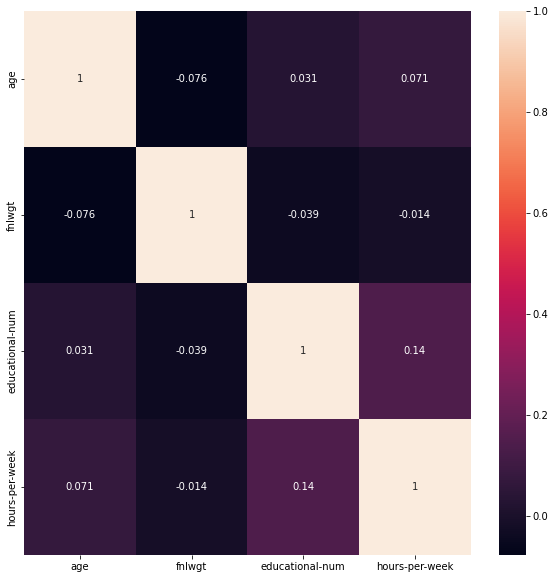

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap( adult_df.corr(),annot=True)

In [ ]:
adult_data=adult_df.copy()

Data Cleaning, Scaling, feature engineering and Encoding

In [ ]:
#handle missing values
adult_data['native-country'].fillna(adult_df['native-country'].mode(), inplace=True)

#to use the knn imputer we should encode the categorical variables firstly so, i'll delay occupation and workclass

In [ ]:
#some feature engineering
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Greater than 60"

adult_data['age_group'] = adult_data['age'].apply(age_group)


In [ ]:
adult_data.drop('age', axis=1, inplace=True)

In [ ]:
adult_data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
#education levels compact
def education_group(y):
  if (y=='11th' or y=='10th' or y=='5th-6th' or y=='9th' or y=='7th-8th' or y=='1st-4th' or y=='12th' or y=='HS-grad'
  or y=='Preschool'):
    return "Pre_collage"
  elif (y=='Some-college' or y=='Bachelors' or y=='Assoc-acdm' or y=='Assoc-voc'):
    return "collage_stage"
  else:
    return "post_Graduate"


In [ ]:
adult_data['education_degree']=adult_data['education'].apply(education_group)

In [ ]:
adult_data.drop('education', axis=1, inplace=True)
adult_data

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group,education_degree
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,19-30,Pre_collage
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,31-40,Pre_collage
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,19-30,collage_stage
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,41-50,collage_stage
4,NaN,103497,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,Greater than 60,collage_stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,19-30,collage_stage
48838,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,31-40,Pre_collage
48839,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,51-60,Pre_collage
48840,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,19-30,Pre_collage


<Axes: >

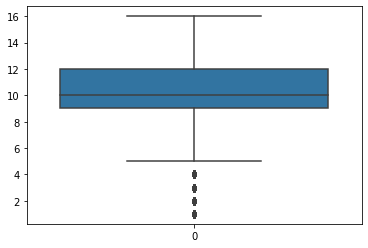

In [ ]:
sns.boxplot(adult_data['educational-num'])

In [ ]:
#Functions to handle the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

def remove_outliers(upper,lower,column,df):
    updatedd_data_one = df[(df[column] > lower) & (df[column] < upper)]
    return updatedd_data_one 


In [ ]:
upper_edu, lower_edu=outliers(adult_data,'educational-num')

In [ ]:
remove_outliers(upper_edu,lower_edu,'educational-num',adult_data)

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group,education_degree
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,19-30,Pre_collage
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,31-40,Pre_collage
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,19-30,collage_stage
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,41-50,collage_stage
4,NaN,103497,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,Greater than 60,collage_stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,19-30,collage_stage
48838,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,31-40,Pre_collage
48839,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,51-60,Pre_collage
48840,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,19-30,Pre_collage


<Axes: >

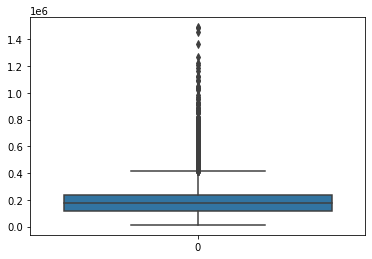

In [ ]:
sns.boxplot(adult_data['fnlwgt'])

In [ ]:
upper_f, lower_f=outliers(adult_data,'fnlwgt')
print(upper_f,lower_f)

417683.125 -62521.875


In [ ]:
remove_outliers(upper_f,lower_f,'fnlwgt',adult_data)

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group,education_degree
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,19-30,Pre_collage
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,31-40,Pre_collage
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,19-30,collage_stage
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,41-50,collage_stage
4,NaN,103497,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,Greater than 60,collage_stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,19-30,collage_stage
48838,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,31-40,Pre_collage
48839,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,51-60,Pre_collage
48840,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,19-30,Pre_collage


In [ ]:
#check inconsistent data
def check_inconsistentity(df):
  for column in (df.select_dtypes(include='object')).columns:
    a=df[column].unique()
    print(a)

In [ ]:
check_inconsistentity(adult_data)

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Male' 'Female']
['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia

In [ ]:
#a function to convert both lower and white spaces
def convert_lower_spaces(df):
  for column in (df.select_dtypes(include='object')).columns:
    df[column].str.lower()
    df[column].str.strip()  

In [ ]:
convert_lower_spaces(adult_data)

In [ ]:
#Encoding*******************************************

categorical = [feature for feature in adult_data.columns if adult_data[feature].dtype == 'O']
categorical

#workclass and occupation after knn imputer with binary encoding
#gender and income ...........mapping
# marital-status , relationship and race ....one hot encoding
#age_group and education_degree ......Label encoding cause, they're ordered

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income',
 'age_group',
 'education_degree']

In [ ]:
adult_data['native-country'].unique() # a lot of cardinality that i will use hashing encoder

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [ ]:
adult_data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
adult_data['gender']=adult_data['gender'].replace(['Male','Female'],['1','0'])
adult_data['income']=adult_data['income'].replace(['>50K','<=50K'],['0','1'])
adult_data

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group,education_degree
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,1,19-30,Pre_collage
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,1,31-40,Pre_collage
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,0,19-30,collage_stage
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,0,41-50,collage_stage
4,NaN,103497,10,Never-married,NaN,Own-child,White,0,30,United-States,1,Greater than 60,collage_stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,1,19-30,collage_stage
48838,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,0,31-40,Pre_collage
48839,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,1,51-60,Pre_collage
48840,Private,201490,9,Never-married,Adm-clerical,Own-child,White,1,20,United-States,1,19-30,Pre_collage


In [ ]:
#handle the imbalanced_data of income(target column)


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label=adult_data[['age_group','education_degree']]
for column in label.columns:
  adult_data[column]=LabelEncoder().fit_transform(adult_data[column])

adult_data

,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group,education_degree
0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,1,0,0
1,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,1,1,0
2,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,0,0,1
3,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,0,2,1
4,NaN,103497,10,Never-married,NaN,Own-child,White,0,30,United-States,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,1,0,1
48838,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,0,1,0
48839,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,1,3,0
48840,Private,201490,9,Never-married,Adm-clerical,Own-child,White,1,20,United-States,1,0,0


In [ ]:
#hashing encoding
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

encoder_purpose = ce.HashingEncoder(n_components=4, cols=['native-country'])
adult_data=encoder_purpose.fit_transform(adult_data)

In [ ]:
adult_data

,col_0,col_1,col_2,col_3,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income,age_group,education_degree
0,0,0,1,0,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,1,0,0
1,0,0,1,0,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,1,1,0
2,0,0,1,0,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,0,0,1
3,0,0,1,0,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,0,2,1
4,0,0,1,0,NaN,103497,10,Never-married,NaN,Own-child,White,0,30,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,0,38,1,0,1
48838,0,0,1,0,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,0,1,0
48839,0,0,1,0,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,0,40,1,3,0
48840,0,0,1,0,Private,201490,9,Never-married,Adm-clerical,Own-child,White,1,20,1,0,0


In [ ]:
aadult=adult_data.copy()

In [ ]:
#dummies
for column in ['relationship', 'marital-status','race','occupation','workclass']:
  dummies = pd.get_dummies(aadult[column])
  aadult[dummies.columns] = dummies

In [ ]:
aadult.drop(['relationship','marital-status','race','occupation','workclass'],axis=1, inplace=True)


In [ ]:
aadult


,col_0,col_1,col_2,col_3,fnlwgt,educational-num,gender,hours-per-week,income,age_group,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,1,0,226802,7,1,40,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,89814,9,1,50,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,336951,12,1,40,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,160323,10,1,40,0,2,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,103497,10,0,30,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,1,0,257302,12,0,38,1,0,...,1,0,0,0,0,1,0,0,0,0
48838,0,0,1,0,154374,9,1,40,0,1,...,0,0,0,0,0,1,0,0,0,0
48839,0,0,1,0,151910,9,0,40,1,3,...,0,0,0,0,0,1,0,0,0,0
48840,0,0,1,0,201490,9,1,20,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#split the data
x=aadult.drop('income', axis=1)
y=aadult['income']
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
#standard Scaling to apply pca
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train_scale = SC.fit_transform(X_train)
x_test_scale = SC.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA
 
pca_train = PCA(n_components=5)
pca_test =PCA(n_components=5)
 
pca_features = pca_train.fit_transform(x_train_scale)
pca_test = pca_test.fit_transform(x_test_scale)
 
print('Shape before PCA: ', x_train_scale.shape)
print('Shape after PCA: ', pca_features.shape)

print('Shape before PCA: ', x_test_scale.shape)
print('Shape after PCA: ', pca_test.shape)
 
pca_train = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','pc4','pc5'])

pca_test = pd.DataFrame(
    data=pca_test, 
    columns=['PC1', 'PC2', 'PC3','pc4','pc5'])


Shape before PCA:  (36592, 50)
Shape after PCA:  (36592, 5)
Shape before PCA:  (12198, 50)
Shape after PCA:  (12198, 5)


In [ ]:
pca_train

,PC1,PC2,PC3,pc4,pc5
0,0.822018,-2.228870,-0.483005,-1.819416,-0.486424
1,1.647685,-0.900596,-0.926693,-1.599149,-0.426932
2,0.982035,-1.251837,-0.887208,-1.050289,-0.080156
3,-2.013452,0.386830,-0.454871,-0.195447,0.019921
4,-0.929127,2.807158,0.649168,0.781435,2.956244
...,...,...,...,...,...
36587,-2.784387,-3.504704,1.227266,-1.159533,0.712948
36588,0.000774,0.983333,-0.463927,1.560870,-0.057195
36589,2.343157,1.880957,0.471089,0.342582,2.547075
36590,2.304109,-0.511367,-1.724237,-1.885049,0.398016


In [ ]:
#handle the imbalanced data
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(pca_train, y_train.ravel())
#when i applied these the accuracy was decreased, so we should have a dedicated criteria to handle the imbalanced with oversample or downsample

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticReggg = LogisticRegression()
logisticReggg.fit(pca_train,y_train )

LogisticRegression()

In [ ]:
predicted=logisticReggg.predict(pca_test)

In [ ]:
predicted.tolist()

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# print classification report
print("Accuracy score is: ",accuracy_score(y_test, predicted))
#print("Recall score is: ",recall_score(y_t#est, predicted))
#print("Precision score is: ",precision_score(y_test, predicted))
print("Confusion Matrix: \n",confusion_matrix(y_test, predicted)) 
#imbalnced data problem : i'll try to handle more

Accuracy score is:  0.8077553697327431
Confusion Matrix: 
 [[1369 1584]
 [ 761 8484]]
